# Aufgabe 3: Faltung
Ein wichtiger Basisalgorithmus in der Bildverarbeitung ist die diskrete Faltung
\begin{align}
 \boldsymbol{I}_A(i,j) = (\boldsymbol{I} * \boldsymbol{A})(i, j) = \sum_{h=-\lfloor \frac{m}{2} \rfloor}^{ \lfloor \frac{m}{2} \rfloor} \sum_{k=-\lfloor \frac{n}{2} \rfloor}^{ \lfloor \frac{n}{2} \rfloor} \boldsymbol{A}(h,k) \cdot \boldsymbol{I}(i-h, j-k).
 \label{eqn:lin_filt}
\end{align}

Hierbei wird eine Faltungsmaske $\boldsymbol{A} \in \mathbb{R}^{m \times n}$ verwendet und über das Eingabebild $\boldsymbol{I}$ "geschoben".
Dabei wird für jedes Pixel des Eingabebildes eine mit den korrespondierenden Einträgen der Faltungsmaske gewichtete Linearkombination der Nachbarschaftspixel berechnet.
Verschiedene Faltungsmasken haben dabei unterschiedliche Auswirkungen auf das Bild.

Eine einfache Faltungsmaske ist z.~B. der Mittelwertfilter $\boldsymbol{A}_\text{avg}$, der für eine
Größe $m=n=3$ die folgende Form hat:

\begin{equation}
 \boldsymbol{A}_\text{avg} = \frac{1}{9} \left(\begin{array}{ccc}1&1&1\\1&1&1\\1&1&1\end{array}\right).
\end{equation}

Schreiben Sie eine Python-Funktion, die diesen Mittelwertfilter auf ein Bild anwendet!
Achten Sie bei der Implementierung darauf, dass die Faltungsmaske $\boldsymbol{A}$ leicht ausgetauscht werden kann!
Überlegen Sie sich ein Vorgehen bei der Behandlung der an den Bildrändern gelegenen Pixeln!

## 0. Pfade, Pakete etc.

In [1]:
import glob
import urllib.request

%matplotlib notebook
import matplotlib.pyplot as plt

import imageio
import numpy as np

In [2]:
image_filter = '../material/Bilder/*.jpg'

## 1. Definition der Faltungsmaske
Definieren Sie hier die Faltungsmaske `A_avg` für den Mittelwertfilter!

In [3]:
A_avg = 1/9 * np.ones(shape=(3, 3))

## 2. Laden des Bildes

In [4]:
image_path = np.random.choice(glob.glob(image_filter))
image = imageio.imread(image_path)

Für diese Aufgabe ist es wichtig, das Bild im Fließkommaformat vorliegen zu haben. Konvertieren sie `image` zu einer geeigneten Repräsentation:

In [5]:
image = np.asarray(image, dtype=np.float32) / 255

## 3. Berechung der Faltung
Definieren Sie eine Funktion `ex2_convolve`, die ein Bild sowie eine Faltungsmaske übergeben bekommt und als Rückgabewert das gefaltete Bild liefert. Denken Sie an ein sinnvolles Vorgehen zur Behandlung der Bildränder.

OutputWidth=(Width−FilterWidth+2Padding)/Stride+1, where we have Stride=1 and FilterWidth=filter_mask.shape[0]

since OutputWidth=Width, we have Padding = (FilterWidth - 1) / 2

In [6]:
def ex2_convolve(image, filter_mask):
    convolved_image = np.zeros_like(image)
    filter_mask = np.asarray(filter_mask)
    padding_size_x = int(np.rint((filter_mask.shape[0] - 1) / 2))
    padding_size_y = int(np.rint((filter_mask.shape[1] - 1) / 2))
    padded_image = np.pad(image, ((padding_size_x, padding_size_y), (padding_size_x, padding_size_y)), mode='constant', constant_values=0)
    for j in range(0, padded_image.shape[1]):
        for i in range(0, padded_image.shape[0]):
            if (i+filter_mask.shape[0] <= padded_image.shape[0] and j+filter_mask.shape[1] <= padded_image.shape[1]):
                area = image[i:i+filter_mask.shape[0], j:j+filter_mask.shape[1]]
                for i_y in range(0, area.shape[1]):
                    for i_x in range(0, area.shape[0]):
                        convolved_image[i, j] += area[i_x, i_y] * filter_mask[i_x, i_y]
    return convolved_image

Nun wird das gefaltete Bild mit Hilfe der Funktion berechnet:

In [7]:
convolved_image = ex2_convolve(image, A_avg)

## 4. Darstellung
Um die Wirksamkeit der Faltung zu überprüfen, stellen Sie `image` und `convolved_image` nebeneinander dar:

<IPython.core.display.Javascript object>


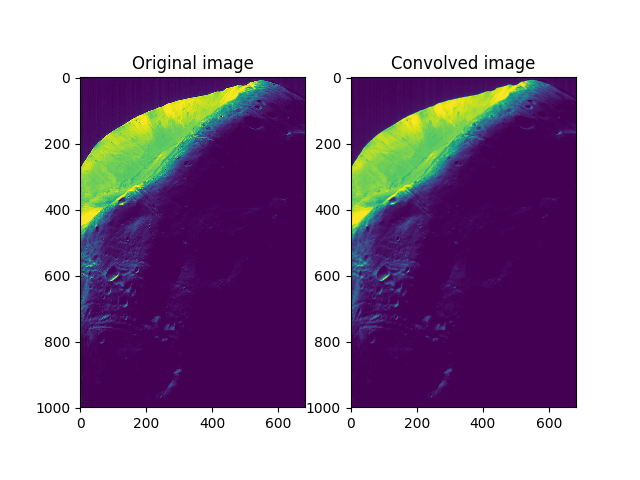

Text(0.5, 1.0, 'Convolved image')

In [8]:
fig, axs = plt.subplots(nrows=1, ncols=2, sharex=True)
axs[0].imshow(image)
axs[0].set_title('Original image')

axs[1].imshow(convolved_image)
axs[1].set_title('Convolved image')